In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import os

df = pd.read_csv("cancer-analysis/data.csv")
del df["Unnamed: 32"], df["id"]

In [2]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [3]:
def plot_corr(df, size):
    corr = df.corr()
    flg, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

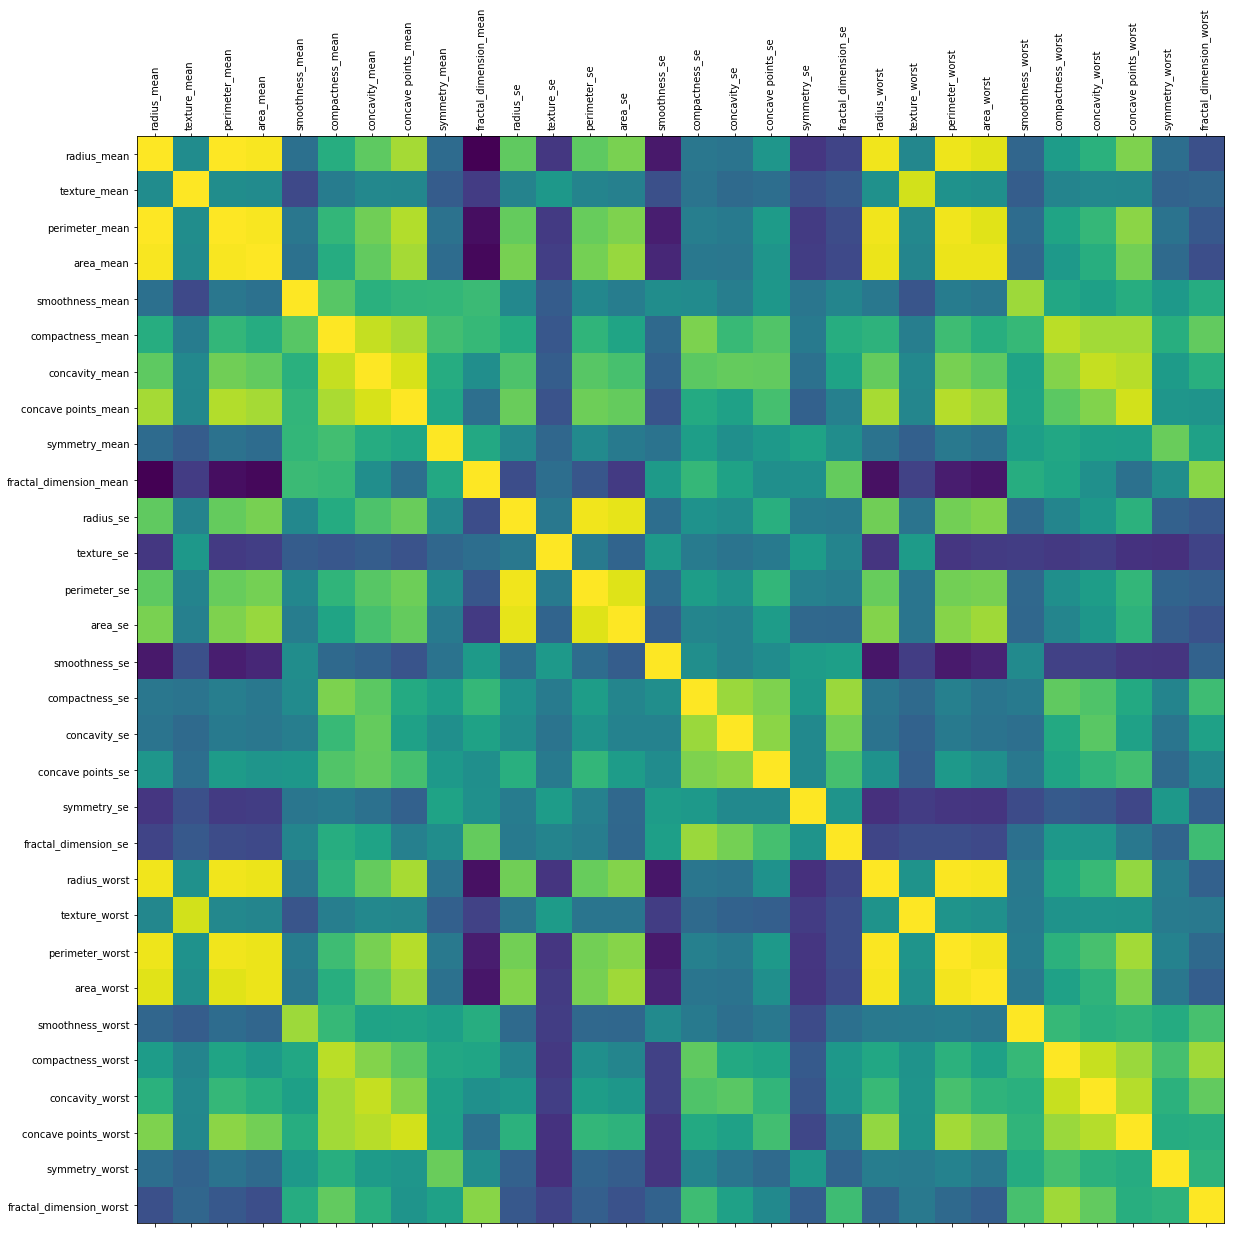

In [4]:
plot_corr(df, 20)

In [5]:
del df["perimeter_mean"], df["area_mean"]

In [6]:
del df["perimeter_se"], df["area_se"]

In [7]:
del df["perimeter_worst"], df["area_worst"], df["radius_worst"]

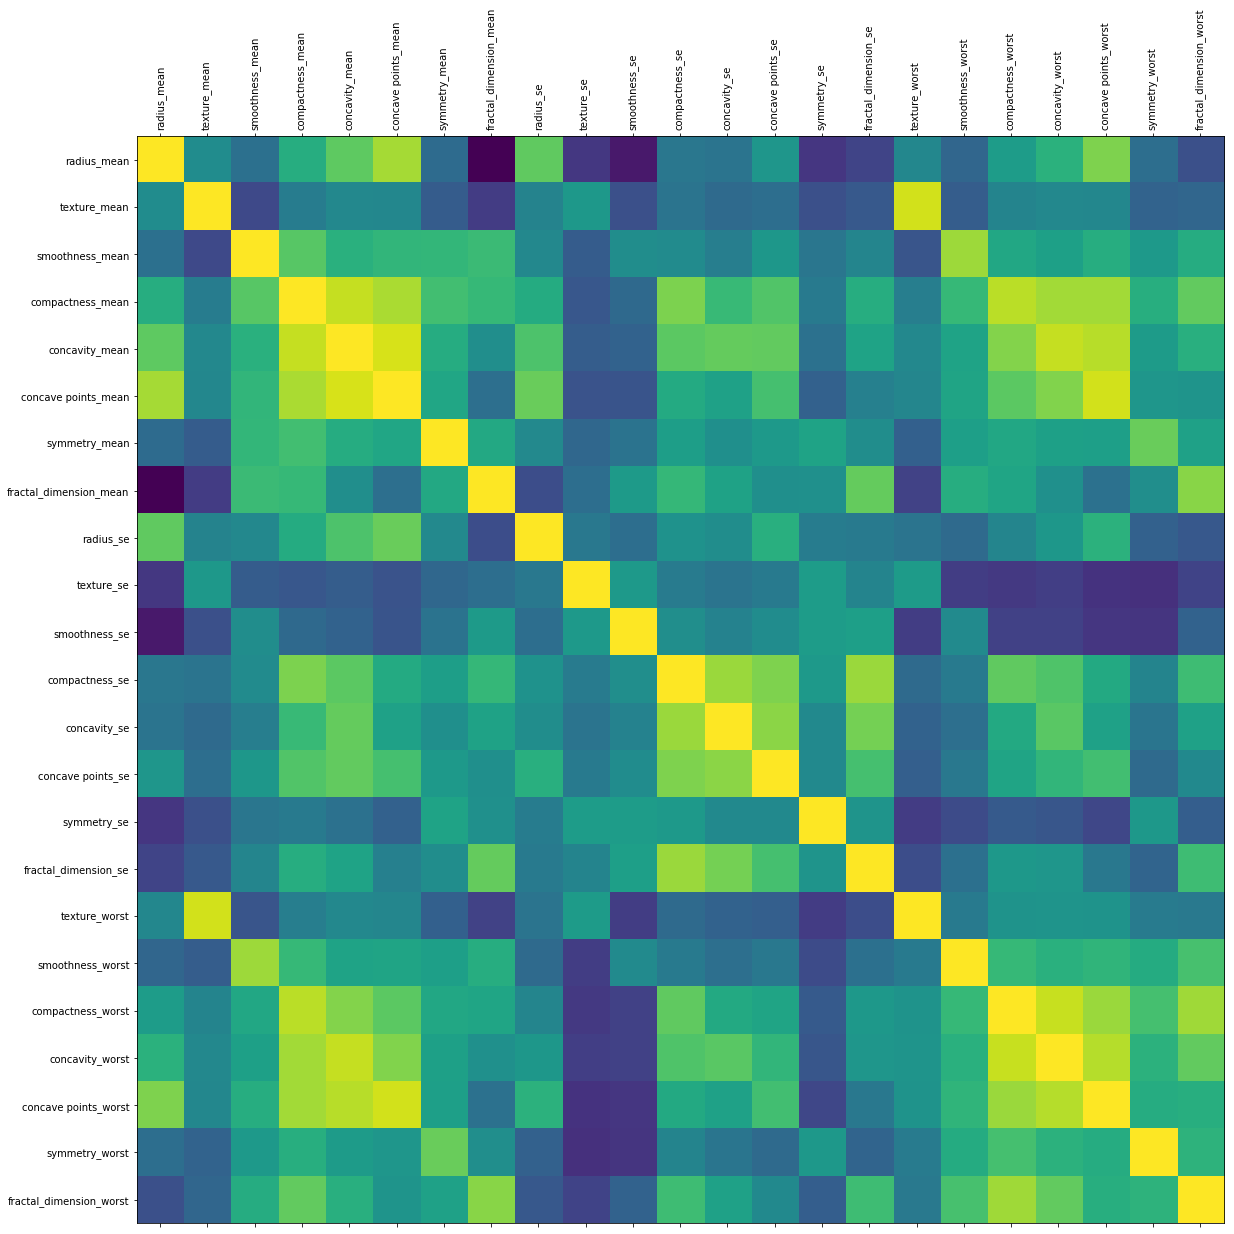

In [8]:
plot_corr(df, 20)

In [9]:
df["diagnosis"] = df["diagnosis"].map({"M":1, "B":0})

In [10]:
features = df.columns
predict  = ["diagnosis"]
features = list(features.delete(features.get_loc("diagnosis")))

In [11]:
from sklearn.model_selection import train_test_split

x = df[features].values
y = df[predict].values

split_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_size, random_state=42)

In [12]:
len(x_train), len(x_test), len(y_train), len(y_test)

(398, 171, 398, 171)

In [13]:
len(y_test[y_test[:] == 1]), len(y_test[y_test[:] == 0]), \
len(y_train[y_train[:] == 1]), len(y_train[y_train[:] == 0])

(63, 108, 149, 249)

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='mean')

In [15]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)
x_train

array([[13.74   , 17.91   ,  0.07944, ...,  0.06019,  0.235  ,  0.07014],
       [13.37   , 16.39   ,  0.07115, ...,  0.08978,  0.2048 ,  0.07628],
       [14.69   , 13.98   ,  0.1031 , ...,  0.1108 ,  0.2827 ,  0.09208],
       ...,
       [14.29   , 16.82   ,  0.06429, ...,  0.03333,  0.2458 ,  0.0612 ],
       [13.98   , 19.62   ,  0.106  , ...,  0.1827 ,  0.3179 ,  0.1055 ],
       [12.18   , 20.52   ,  0.08013, ...,  0.07431,  0.2694 ,  0.06878]])

In [16]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
x_train_predict = nb_model.predict(x_train)
x_test_predict = nb_model.predict(x_test)

In [18]:
from sklearn import metrics
print("Train Accuracy = %f" % metrics.accuracy_score(y_train, x_train_predict))
print("Test  Accuracy = %f" % metrics.accuracy_score(y_test, x_test_predict))

Train Accuracy = 0.917085
Test  Accuracy = 0.918129
